<a href="https://colab.research.google.com/github/kfukutom/cmplxsys335/blob/main/kfukutom_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 PageRank for a web network

In [ ]:
# required packages, libraries
from csv import reader
import networkx as nx
from numpy import zeros, ones, sum
from networkx.drawing.nx_pydot import pydot_layout

In [ ]:
# Question 1A)
G = nx.read_adjlist('mi_adjlist.txt', nodetype=int, create_using=nx.DiGraph)
r = reader(open('mi_nodes.csv', 'r'))
N = G.number_of_nodes()
E = G.number_of_edges()

print(f"Number of Nodes: {N}\nNumber of Edges: {E}")


Number of Nodes: 1796
Number of Edges: 50734


In [ ]:
# Question 1B)
# ~ Page Rank Calculation, Power-Method
ALPHA = 0.85

x = ones(N, float)
for r in range(20):
  xp = zeros(N, float)
  for i in G:
    xsum = 0.0
    for j in G.predecessors(i):
      xsum += x[j] / G.out_degree(j)
    xp[i] = ALPHA  * xsum + 1

  x = xp

# compute the T10
with open("mi_nodes.csv", 'r') as file:
    r = reader(file)
    name = [data[0:3] for data in r]

results = [(x[i], name[i]) for i in G]

results.sort(reverse=True)
print("Top 10 nodes by PageRank:\n")
for i in range(10):
    print(results[i], "\n")

Top 10 nodes by PageRank:

(781.9490349976802, ['792', 'State of Michigan', 'http://www.michigan.gov']) 

(116.34621803595235, ['66', 'State Police', 'http://www.michigan.gov/msp']) 

(113.60458093631934, ['675', 'Environmental Quality', 'http://www.michigan.gov/deq']) 

(78.64756184067092, ['724', 'Travel Michigan', 'http://www.michigan.org/']) 

(78.0330563085614, ['797', 'Human Services', 'http://www.michigan.gov/dhs']) 

(70.95037874595958, ['1299', 'Senate', 'http://senate.michigan.gov/']) 

(69.07930944386142, ['896', 'Grand Valley State University', 'http://www.gvsu.edu/']) 

(68.44543671463626, ['497', 'Transportation', 'http://www.michigan.gov/mdot/']) 

(59.694100768408674, ['908', 'Licensing and Regulatory Affairs', 'http://www.michigan.gov/lara']) 

(45.20646923347464, ['356', 'Student Financial Aid', 'http://www.michigan.gov/mistudentaid']) 



Question 1c)


---
I noticed that the top five websites by the PageRank system are all web pages from the same domain, https://www.michigan.gov, with the highest ranking coming from the main domain itself. By the definition of PageRank, this makes sense because PageRank prioritizes pages based on the quantity and quality of incoming links. Since these pages are interlinked within the same domain, they form a tightly connected network, passing significant "link authority" between each other. Additionally, the main domain is likely to have the most incoming links from both internal pages and external sources, which further contributes to its high rank. This interconnected structure amplifies the importance of this entire webpage's 'connected-ness'.


#2 Ranking in Big-10 football

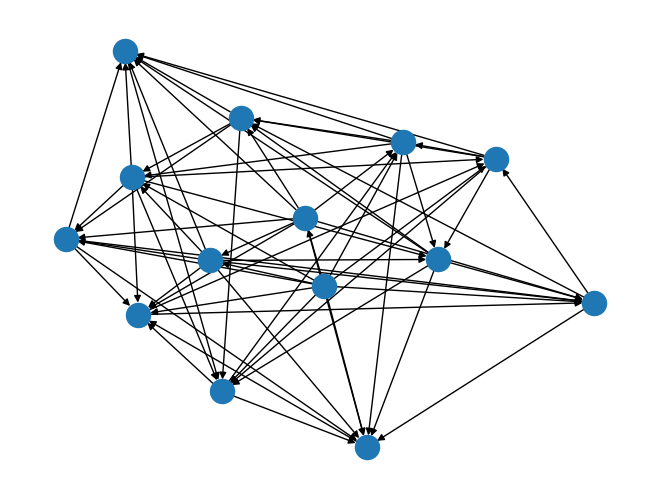

In [ ]:
# Question 2A)
G = nx.DiGraph(node_type=int)
with open('big10.csv', 'r') as file:
  r = reader(file)
  for line in r:
    winner, loser = line[0], line[1]
    G.add_edge(winner, loser)

nx.draw(G)

In [ ]:
import numpy as np

# Question 2B)
# ~ Bradley-Terry Model
N = G.number_of_nodes()
pi = ones(N, float)
index = {node: i for i, node in enumerate(G.nodes())}

for r in range(20):
    xp = np.zeros(N, float)

    for i in G:
        num, denom = 0.0, 0.0

        for j in G.successors(i):
            num += pi[index[j]] / (pi[index[i]] + pi[index[j]])

        for j in G.predecessors(i):
            denom += 1 / (pi[index[i]] + pi[index[j]])

        xp[index[i]] = ((1/(pi[index[i]]+1))+num) / ((1/(pi[index[i]]+1))+denom)

    pi = xp

In [ ]:
# Question 2C)
results = [(node, pi[index[node]]) for node in G.nodes()]
results.sort(reverse=True)
print("Big 10 Teams Strength:\n")
for i in range(len(results)):
    for j in range(0, len(results) - i - 1):
        if results[j][1] < results[j + 1][1]:
            results[j], results[j + 1] = results[j + 1], results[j]

for i in range(len(results)):
    print(f"Team: {results[i][0]}, Score: {results[i][1]}\n")

Big 10 Teams Strength:

Team: Michigan, Score: 14.958165712362531

Team: Ohio State, Score: 6.039969150888753

Team: Penn State, Score: 3.4460197422374135

Team: Purdue, Score: 1.4793497910883049

Team: Iowa, Score: 1.2849677450406796

Team: Illinois, Score: 1.0902156476188984

Team: Minnesota, Score: 0.9879294853759291

Team: Maryland, Score: 0.8446658784946369

Team: Wisconsin, Score: 0.7794487665073998

Team: Michigan State, Score: 0.6159832111478092

Team: Nebraska, Score: 0.45752632884878947

Team: Indiana, Score: 0.38640386241384417

Team: Northwestern, Score: 0.245605126194076

Team: Rutgers, Score: 0.22657968025832773



Question 2D)


---

**University of Michigan, Ann Arbor** is ranked as #1 in the Big 10 Conference under the Bradley-Terry Calculation. Closely next to us was **Ohio State University** in second place.

In [ ]:
# Question 2E)
purdue = pi[index["Purdue"]]
mi_state = pi[index["Michigan State"]]

print(f"The probability that Purdue beats Michigan State is {(purdue / (purdue + mi_state))}")
print(f"The probability that Michigan State beats Purdue is {mi_state / (mi_state + purdue)}")

The probability that Purdue beats Michigan State is 0.7060213290725439
The probability that Michigan State beats Purdue is 0.2939786709274561




---

Based on the above calculations, **Purdue University** would more likely to win this match-up.

#3 Modularity on the web

In [ ]:
# Question 3A)
# Reading in our network as UNDIRECTED
G = nx.read_adjlist('polblogs.txt', nodetype=int, create_using=nx.Graph)

# Left/Right Wing Data
index = {node for node in G.nodes()}
nodes = {node: [] for node in index}

with open('polblogs.csv', 'r') as file:
  r = reader(file)
  for line in r:
    node = int(line[0])
    if node in nodes:
      nodes[node] = line

In [ ]:
# Question 3B)
M = G.number_of_edges()
modularity  = 0

for i, j in G.edges():
  if i == j:
    continue # self edge check, think, might remove

  k_i = G.degree[i]
  k_j = G.degree[j]

  if nodes[i][2] == nodes[j][2]:
    modularity += (1 - (k_i * k_j) / (2*M))
Q = (1 / (2*M)) * modularity
print(f"Calculated Modularity: {Q}")

Calculated Modularity: 0.3796408929739155


Question 3C)


---
Since our score is deviating away from 0 slightly, it's probably suggesting some moderate inference for political orientation. What this means essentially is that, obviously, similar publishers with corresponding political preferences will share similar views and shared information with one another, implying this relationship. Ultimately, this exercise is demonstrating the use of modularity, to describe political polarization within publishing in this field of politics and beyond.
*   **Score: 0.3796408929739155, rounds to 0.4**




#4 Predicting political affiliation

In [ ]:
# Question 4A)
# Reading in our network as UNDIRECTED
G = nx.read_adjlist('polblogs.txt', nodetype=int, create_using=nx.Graph)

# Left/Right Wing Data
index = {node for node in G.nodes()}
nodes = {node: [] for node in index}

with open('polblogs.csv', 'r') as file:
    r = reader(file)
    for line in r:
        node = int(line[0])
        affiliation = line[2]
        nodes[node] = affiliation
        if node not in G:
            G.add_node(node)

In [ ]:
# Question 4B, 4C)
correct, total = 0, 0

for node in G.nodes():
  left = 0
  right = 0
  for neighbor in G.neighbors(node):
    if nodes[neighbor] == 'Left':
      left += 1
    elif nodes[neighbor] == 'Right':
      right += 1

  if left > right:
    prediction = 'Left'
  elif right > left:
    prediction = 'Right'
  else: # tie situation
    prediction = 'Dont Know'

  total += 1 # <-- don't know is assumed to be incorrect.
  if prediction == nodes[node]:
    correct += 1

# calculate our overall accuracy
scoring_metric = correct / total if total > 0 else 0
print(f"Scoring Accuracy: {scoring_metric}")

Scoring Accuracy: 0.7758389261744967
